# Examples of plugins usage in folium

In this notebook we show a few illustrations of folium's plugin extensions.

This is a development notebook

In [1]:
# This is to import the repository's version of folium ; not the installed one.
import sys, os
sys.path.insert(0,'..')
import folium
from folium import plugins

In [2]:
import numpy as np
import json

### Preliminaries

In this section, we define a few hack functions to render nicely maps into the notebook so that one can see them on github.

This is useful, but completely out of this notebook's scope (sorry).

To have the hack working, you need to be in a linux environment (I'm using Ubuntu 14.04) with <a href="http://wkhtmltopdf.org/">`wkhtmltopdf`</a> installed (I'm using version 0.12.1).

In [3]:
from IPython.display import HTML, Image

In [4]:
def _repr_html_(self, figsize=(17,10), **kwargs):
    """Displays in the notebook a folium.folium.Map object.

    Parameters
    ----------
        self : folium.Map object
            The map you want to display

        figsize : tuple of length 2, default (17,10)
            The size of the output you expect in inches.
            Output is 60dpi so that the output has same size as a
            matplotlib figure with the same figsize.

    """
    self._build_map(**kwargs)
 
    width, height = figsize
 
    iframe = '<iframe src="data:text/html;base64,{html}" width="{width}" height="{height}"></iframe>'\
        .format(html = self.HTML.encode('base64'),
                width = int(60.*width),
                height= int(60.*height),
               )
    return HTML(iframe)


def _repr_jpg_(self, figsize=(17,10), quality=50, **kwargs):
    """Displays in the notebook a folium.folium.Map object, as a JPG image.
    
    Parameters
    ----------
        self : folium.Map object
            The map you want to display

        figsize : tuple of length 2, default (17,10)
            The size of the output you expect in inches.
            Output is 60dpi so that the output has same size as a
            matplotlib figure with the same figsize.

        quality : int, default 50
            A quality measure between 0 and 100 the be passed to `wkhtmltoimage`.
    """
    self._build_map(**kwargs)
 
    width, height = figsize
 
    iframe = '<iframe src="data:text/html;base64,{html}" width="{width}" height="{height}"></iframe>'\
        .format(html = self.HTML.encode('base64'),
                width = int(60.*width),
                height= int(60.*height),
               )
    open('/tmp/foo.html','w').write(iframe)
    os.system('wkhtmltoimage --quality %s /tmp/foo.html /tmp/foo.jpg' % int(quality))
    
    return Image(filename='/tmp/foo.jpg', width=60*17)


## ScrollZoomToggler

Adds a button to enable/disable zoom scrolling.

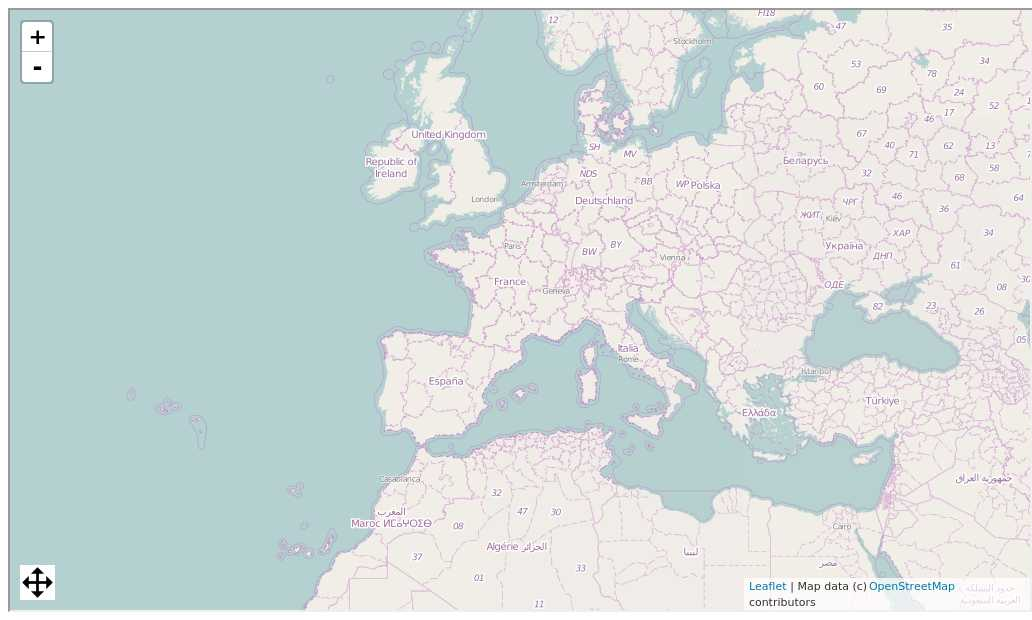

In [5]:
a_map = folium.Map([45.,3.], zoom_start=4)
a_map.add_plugin(plugins.ScrollZoomToggler())
_repr_jpg_(a_map)

## MarkerCluster

Adds a MarkerCluster layer on the map.

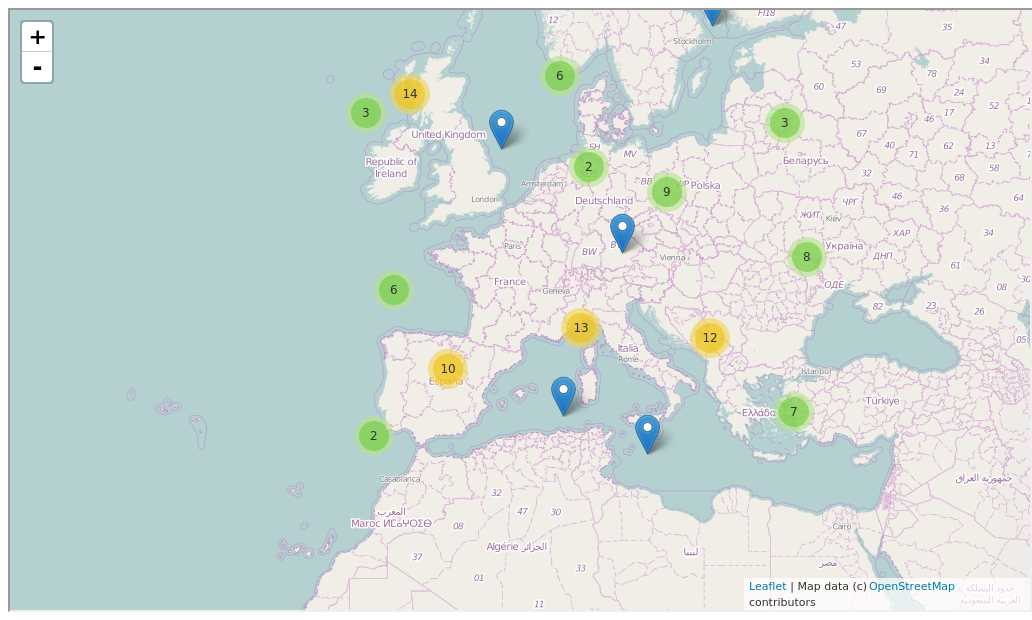

In [6]:
N = 100
data = np.array([
    np.random.uniform(low=35,high=60, size=N),   # random latitudes in Europe
    np.random.uniform(low=-12,high=30, size=N),  # random longitudes in Europe
    range(N),                                    # popups are simple numbers 
    ]).T
a_map = folium.Map([45.,3.], zoom_start=4)
a_map.add_plugin(plugins.MarkerCluster(data))
_repr_jpg_(a_map)

## Terminator

TODO : implement this plugin, inspired from https://github.com/joergdietrich/Leaflet.Terminator

In [7]:
mapa = folium.Map([45.,3.], zoom_start=1)
mapa.add_plugin(plugins.Terminator())
mapa.add_plugin(plugins.ScrollZoomToggler())
_repr_html_(mapa)

##  Leaflet.boatmarker

TODO : implement this plugin, inspired from https://github.com/tomaszbrue/leaflet.boatmarker

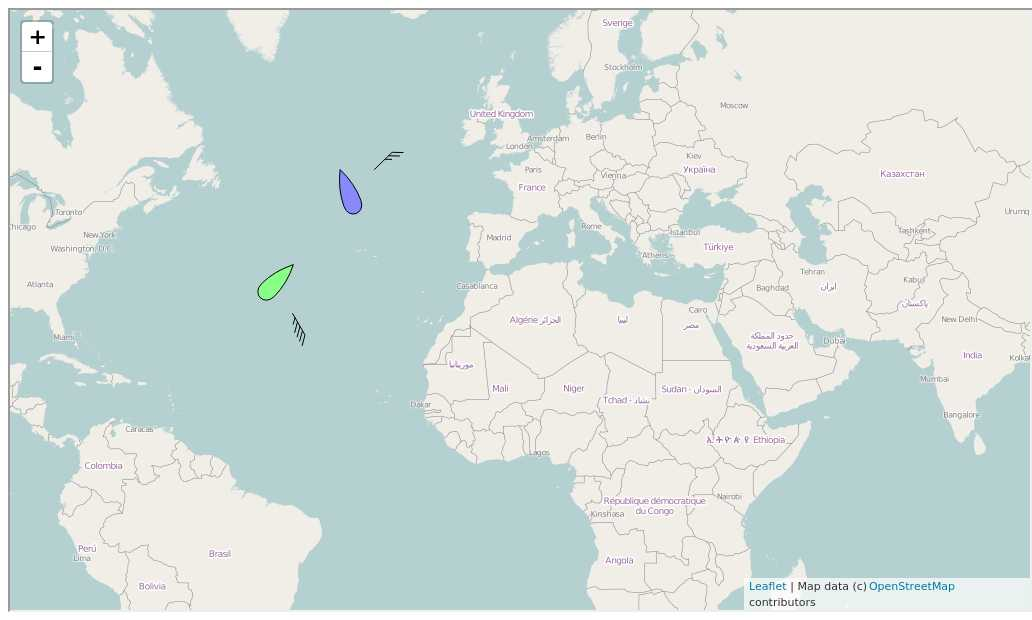

In [8]:
a_map = folium.Map([30.,0.], zoom_start=3)
a_map.add_plugin(plugins.BoatMarker((34,-43), heading=45, wind_heading=150, wind_speed=45, color="#8f8"))
a_map.add_plugin(plugins.BoatMarker((46,-30), heading=-20, wind_heading=46, wind_speed=25, color="#88f"))
_repr_jpg_(a_map)

## GeoJson

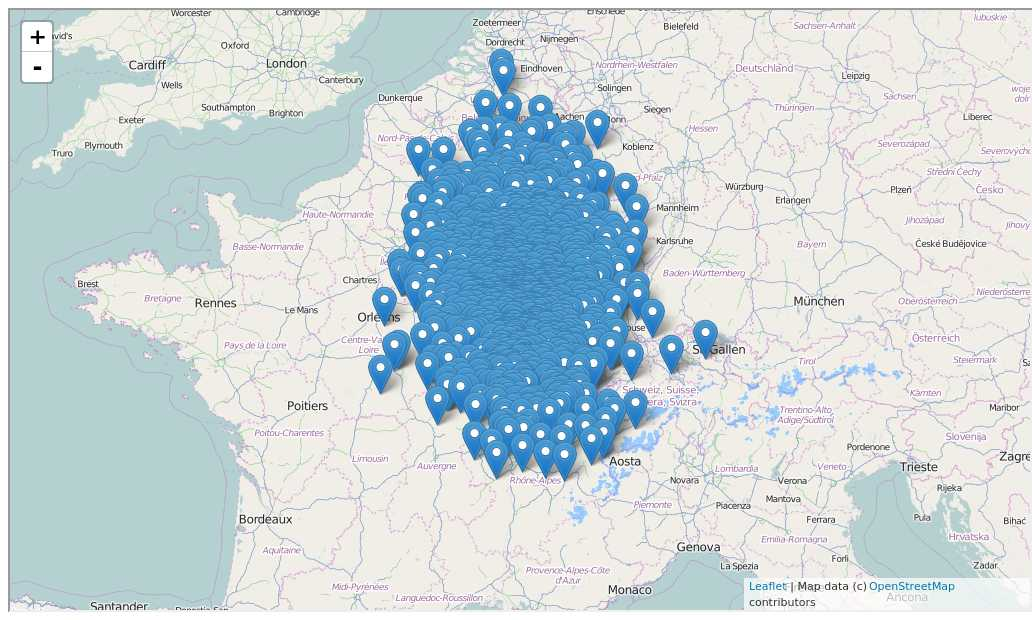

In [9]:
N=1000
lons = +5 - np.random.normal(size=N)
lats = 48 - np.random.normal(size=N)

data = {
    "type": "FeatureCollection",
        "features": [
            {
                "type": "Feature",
                "geometry": {
                    "type": "MultiPoint",
                    "coordinates": [[lon, lat] for (lat,lon) in zip(lats,lons)],
                    },
                "properties": {"prop0": "value0"}
                },
        ],
    }
mapa = folium.Map([48.,5.], zoom_start=6)
mapa.add_plugin(plugins.GeoJson(data))
_repr_jpg_(mapa)

## Layer and LayerControl

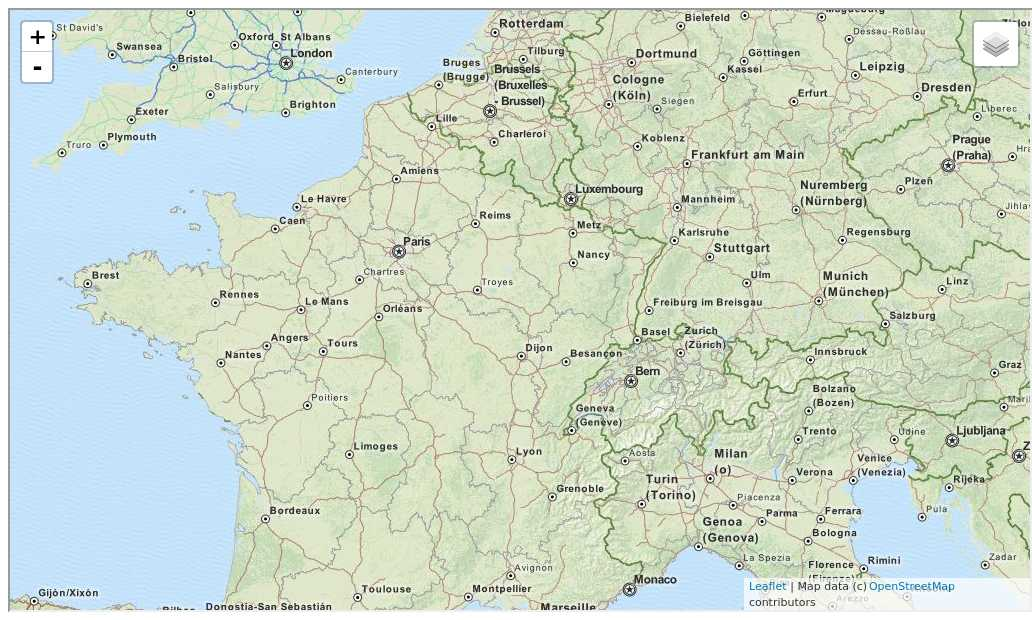

In [10]:
mapa = folium.Map([48.,5.], zoom_start=6)
mapa.add_plugin(plugins.Layer('https://otile1.mqcdn.com/tiles/1.0.0/osm/{z}/{x}/{y}.png',
                              layer_name='MapQuest'))
mapa.add_plugin(plugins.LayerControl("foo"))
_repr_jpg_(mapa)